In [11]:
import sys
sys.path.append("../src")

import tqdm

from create_per_point_dataset import main


import pandas as pd
from IPython.display import clear_output


In [ ]:
# params = {"radius": 50}
params = {"angle": 150,
            "thicknes": 20,
            "diameter": 10}
results = {}
k_values = range(5, 51, 5)

for k in k_values:
    print(f"🧪 Running for neighborhood_size={k}/50 with intervals of 5")
    features, _ = main(k, shape="angle_curve", params=params, noise=False, holes=False)
    
    df = pd.DataFrame(features, columns=[
        "Eigenvalue_curvature", "anisotropy", "linearity", "planarity", 
        "sphericity", "variation", "grad_x", "grad_y", 
        "mean_curvature", "surface_density", "Volume_Density"
    ])
    
    # Save just correlation of features with Volume_Density
    results[k] = df.corr()["Volume_Density"].drop("Volume_Density")
    clear_output(wait=True)

🧪 Running for neighborhood_size=45/50 with intervals of 5
✅ Trying to open part: c:\Users\magnu\OneDrive\Dokumenter\GitHub\R-D\Drawings\Angle_curve\angle_curve.SLDPRT


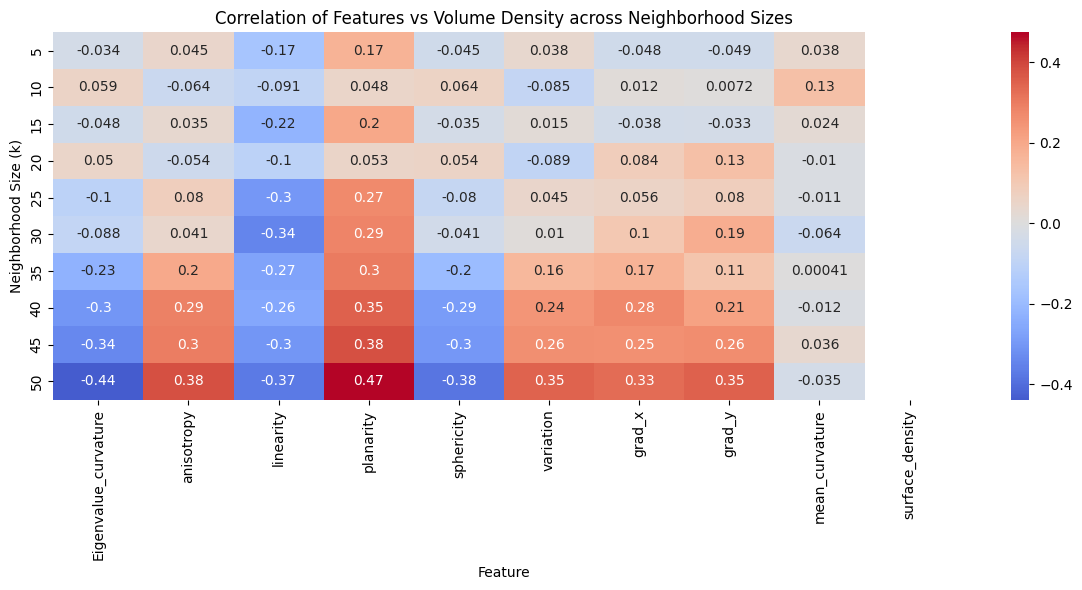

In [ ]:
correlation_df = pd.DataFrame(results).T  # k values as rows
correlation_df.index.name = "k"
correlation_df.columns.name = "Feature"

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Features vs Volume Density across Neighborhood Sizes")
plt.ylabel("Neighborhood Size (k)")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()